In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 903.1/903.1 kB 26.9 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.7 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="ROBOFLOW_API_KEY_HERE")
project = rf.workspace("l-txidr").project("railway_det")
version = project.version(2)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to railway_det-2 in yolov11:: 100%|██████████| 8514/8514 [00:02<00:00, 3379.19it/s]


In [ ]:
#Loading model
model = YOLO("yolo11n-seg.pt")

#Fine-Tuning the model
train_results = model.train(
    data = "/content/railway_det-2/data.yaml",
    epochs = 50,
    imgsz = 640,
    device = 0,

)

100%|██████████| 5.90M/5.90M [00:00<00:00, 103MB/s]


Ultralytics 8.3.54 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolo11n-seg.pt, data=/content/railway_det-2/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sh

100%|██████████| 755k/755k [00:00<00:00, 20.0MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 90.2MB/s]


AMP: checks passed ✅


train: Scanning /content/railway_det-2/train/labels... 2974 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2974/2974 [00:01<00:00, 1742.20it/s]


train: New cache created: /content/railway_det-2/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.24 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/railway_det-2/valid/labels... 848 images, 0 backgrounds, 0 corrupt: 100%|██████████| 848/848 [00:01<00:00, 785.07it/s]

val: New cache created: /content/railway_det-2/valid/labels.cache


Plotting labels to runs/segment/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0005), 100 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/50      3.06G      1.031      3.098      1.801      1.451         40        640: 100%|██████████| 186/186 [01:22<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:12<00:00,  2.12it/s]


                   all        848       1045       0.51      0.647       0.54      0.235      0.422       0.55      0.389      0.126

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/50      3.06G       1.04      2.816      1.264      1.435         32        640: 100%|██████████| 186/186 [01:14<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:12<00:00,  2.19it/s]


                   all        848       1045      0.618      0.595      0.642      0.355      0.604      0.468      0.464      0.171

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/50      3.06G      1.019      2.767      1.135      1.425         38        640: 100%|██████████| 186/186 [01:14<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:10<00:00,  2.53it/s]

                   all        848       1045      0.755      0.662      0.733      0.431      0.677      0.552      0.551      0.196



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/50      3.05G     0.9777      2.724      1.053      1.398         43        640: 100%|██████████| 186/186 [01:16<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.87it/s]

                   all        848       1045      0.845      0.691      0.802      0.574      0.758      0.645      0.664      0.332



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/50      3.01G     0.9031      2.585     0.9465      1.338         46        640: 100%|██████████| 186/186 [01:16<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:10<00:00,  2.59it/s]


                   all        848       1045      0.871      0.796      0.872      0.665      0.837      0.714      0.767      0.418

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/50         3G     0.8803      2.484     0.9099      1.317         41        640: 100%|██████████| 186/186 [01:14<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:11<00:00,  2.40it/s]


                   all        848       1045      0.815      0.756      0.845       0.63       0.77      0.687      0.733        0.4

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/50      3.05G     0.8623      2.408     0.8936      1.304         49        640: 100%|██████████| 186/186 [01:13<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:11<00:00,  2.35it/s]


                   all        848       1045      0.889      0.794      0.891        0.7      0.832      0.741      0.784      0.467

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/50      3.04G     0.8134      2.363     0.8261      1.267         34        640: 100%|██████████| 186/186 [01:14<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:11<00:00,  2.33it/s]


                   all        848       1045       0.87      0.807      0.892      0.691      0.846      0.699      0.764      0.392

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/50      3.03G     0.7931      2.305     0.8044      1.261         45        640: 100%|██████████| 186/186 [01:14<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:10<00:00,  2.48it/s]


                   all        848       1045      0.864      0.811      0.886      0.665      0.796      0.715       0.75       0.42

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/50      3.08G      0.775      2.193     0.7621      1.242         38        640: 100%|██████████| 186/186 [01:15<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.84it/s]


                   all        848       1045      0.839       0.82       0.87      0.667      0.806      0.751      0.783      0.446

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/50      3.02G     0.7633      2.181     0.7685      1.241         47        640: 100%|██████████| 186/186 [01:15<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:10<00:00,  2.69it/s]

                   all        848       1045      0.869      0.782      0.878      0.685      0.864      0.715      0.805        0.5



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/50      3.08G     0.7431      2.113     0.7336      1.223         38        640: 100%|██████████| 186/186 [01:14<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:11<00:00,  2.45it/s]

                   all        848       1045      0.851      0.843       0.91      0.717      0.869      0.735      0.819      0.488



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/50      3.03G     0.7254      2.083     0.7042      1.205         46        640: 100%|██████████| 186/186 [01:13<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:11<00:00,  2.33it/s]

                   all        848       1045      0.927       0.83      0.923      0.772      0.879      0.796      0.845      0.534



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/50      3.02G     0.7251      2.025     0.6926      1.208         44        640: 100%|██████████| 186/186 [01:14<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:11<00:00,  2.38it/s]


                   all        848       1045      0.929      0.846       0.93      0.789      0.902      0.816      0.878      0.582

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/50      3.03G     0.7095      2.003     0.6928      1.194         45        640: 100%|██████████| 186/186 [01:13<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:11<00:00,  2.30it/s]


                   all        848       1045      0.918      0.853      0.931      0.793      0.916      0.789      0.875      0.594

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/50      3.06G     0.6922       2.01     0.6674      1.185         39        640: 100%|██████████| 186/186 [01:13<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:11<00:00,  2.44it/s]


                   all        848       1045      0.927      0.833      0.924      0.775      0.888      0.798      0.875       0.59

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/50      3.04G     0.6949      1.937     0.6525      1.175         42        640: 100%|██████████| 186/186 [01:14<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:10<00:00,  2.66it/s]


                   all        848       1045      0.932       0.85      0.936        0.8      0.897      0.819      0.885      0.591

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/50      3.05G     0.6935      1.928     0.6475      1.177         47        640: 100%|██████████| 186/186 [01:15<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.79it/s]


                   all        848       1045      0.917      0.865      0.944      0.802      0.913      0.807      0.887      0.618

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/50      3.02G     0.6637      1.855     0.6247      1.162         49        640: 100%|██████████| 186/186 [01:16<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.90it/s]

                   all        848       1045      0.913      0.857      0.933      0.806       0.88      0.821       0.87      0.589



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/50      3.04G     0.6682      1.876     0.6246      1.161         47        640: 100%|██████████| 186/186 [01:15<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.71it/s]

                   all        848       1045      0.922      0.877      0.947      0.818      0.895      0.833      0.891      0.608



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/50      3.02G     0.6621      1.855     0.6214      1.158         37        640: 100%|██████████| 186/186 [01:13<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:11<00:00,  2.38it/s]

                   all        848       1045      0.922      0.872      0.944      0.823      0.898      0.834      0.899      0.641



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/50      3.02G     0.6366      1.773     0.5932      1.142         37        640: 100%|██████████| 186/186 [01:12<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:11<00:00,  2.30it/s]


                   all        848       1045      0.906      0.901      0.945      0.831      0.877      0.877      0.905      0.648

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/50      3.04G     0.6469      1.753     0.5974      1.145         51        640: 100%|██████████| 186/186 [01:13<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:11<00:00,  2.32it/s]


                   all        848       1045       0.94      0.853      0.943      0.827      0.911      0.827      0.901      0.635

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/50      3.02G     0.6402      1.788     0.5876      1.135         43        640: 100%|██████████| 186/186 [01:13<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:10<00:00,  2.48it/s]


                   all        848       1045      0.943      0.862      0.944      0.828       0.92      0.849      0.906      0.652

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/50      3.02G     0.6275       1.74     0.5668      1.133         45        640: 100%|██████████| 186/186 [01:14<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:10<00:00,  2.58it/s]


                   all        848       1045      0.894      0.872      0.938      0.817      0.889       0.83      0.899      0.628

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/50      3.05G     0.6205      1.714     0.5618      1.126         54        640: 100%|██████████| 186/186 [01:16<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.88it/s]


                   all        848       1045      0.932      0.899      0.957      0.842      0.898      0.859       0.91      0.648

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/50      3.02G     0.6173      1.655      0.565      1.122         46        640: 100%|██████████| 186/186 [01:16<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.72it/s]

                   all        848       1045      0.947       0.87      0.954      0.846      0.931      0.839      0.916      0.665



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/50      3.03G     0.6092      1.676     0.5559      1.115         46        640: 100%|██████████| 186/186 [01:15<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:11<00:00,  2.28it/s]

                   all        848       1045      0.936       0.91      0.958      0.857      0.908      0.882      0.917      0.662



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/50      3.06G     0.5965      1.644     0.5355      1.109         38        640: 100%|██████████| 186/186 [01:13<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:11<00:00,  2.44it/s]


                   all        848       1045      0.958      0.888       0.96      0.867      0.937      0.862      0.925      0.693

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/50      3.03G     0.6034      1.655     0.5435      1.119         42        640: 100%|██████████| 186/186 [01:14<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:11<00:00,  2.41it/s]


                   all        848       1045      0.949      0.881       0.96      0.852      0.923      0.862      0.926       0.68

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/50      3.02G     0.6036      1.643      0.545      1.111         41        640: 100%|██████████| 186/186 [01:15<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:10<00:00,  2.53it/s]


                   all        848       1045      0.949      0.885      0.962      0.868      0.927      0.864       0.93      0.703

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      32/50      3.05G     0.5975      1.593     0.5357      1.112         53        640: 100%|██████████| 186/186 [01:15<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.75it/s]


                   all        848       1045      0.936      0.917      0.968      0.866       0.92      0.893      0.938      0.707

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.99G     0.5842       1.54     0.5164      1.097         43        640: 100%|██████████| 186/186 [01:16<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.75it/s]

                   all        848       1045      0.937      0.909      0.963      0.877      0.935      0.886      0.938      0.712



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      34/50      3.04G     0.5671      1.524      0.502      1.091         40        640: 100%|██████████| 186/186 [01:15<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:11<00:00,  2.43it/s]

                   all        848       1045       0.95      0.899      0.969      0.874      0.947       0.87      0.939      0.713



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      35/50      3.04G     0.5653       1.53     0.5043      1.087         42        640: 100%|██████████| 186/186 [01:14<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:11<00:00,  2.29it/s]


                   all        848       1045      0.967      0.912       0.97      0.881      0.944      0.891      0.942      0.724

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      36/50      3.05G     0.5637      1.494     0.5021      1.084         45        640: 100%|██████████| 186/186 [01:14<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:11<00:00,  2.35it/s]


                   all        848       1045      0.952      0.917      0.971      0.884      0.935      0.901      0.941      0.729

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      37/50      3.04G     0.5629      1.469     0.4877      1.085         36        640: 100%|██████████| 186/186 [01:14<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:11<00:00,  2.43it/s]


                   all        848       1045      0.959      0.916      0.974      0.895      0.948      0.904      0.951      0.728

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/50      3.07G     0.5631      1.456     0.4801      1.082         52        640: 100%|██████████| 186/186 [01:15<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.72it/s]


                   all        848       1045      0.946      0.923      0.974      0.894      0.961      0.878       0.95      0.735

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      39/50      3.04G     0.5575      1.461     0.4835      1.085         47        640: 100%|██████████| 186/186 [01:17<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.97it/s]


                   all        848       1045      0.941      0.931      0.971      0.888      0.923      0.915      0.952      0.733

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      40/50      3.01G     0.5366      1.391     0.4646      1.067         41        640: 100%|██████████| 186/186 [01:15<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:10<00:00,  2.48it/s]

                   all        848       1045       0.95      0.934      0.973       0.89      0.931      0.916      0.945      0.739


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.95G     0.3871      1.121     0.3519      1.054         18        640: 100%|██████████| 186/186 [01:12<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:10<00:00,  2.52it/s]

                   all        848       1045      0.962      0.927      0.972      0.892      0.946      0.908      0.952      0.749



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.94G     0.3652      1.035     0.3195      1.039         16        640: 100%|██████████| 186/186 [01:10<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.82it/s]


                   all        848       1045      0.972      0.916      0.973      0.898      0.956        0.9       0.95      0.746

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.95G     0.3473     0.9948     0.2946      1.016         16        640: 100%|██████████| 186/186 [01:10<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:11<00:00,  2.26it/s]


                   all        848       1045      0.951      0.932      0.976      0.908       0.94      0.913      0.953      0.767

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.94G      0.341     0.9888     0.2893      1.013         18        640: 100%|██████████| 186/186 [01:10<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:11<00:00,  2.36it/s]

                   all        848       1045      0.952       0.94      0.981       0.91      0.936      0.927      0.955      0.767



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.95G      0.336     0.9594     0.2838      1.008         16        640: 100%|██████████| 186/186 [01:10<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.84it/s]

                   all        848       1045       0.96      0.929      0.978      0.917      0.949      0.921      0.961      0.788



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.94G     0.3234     0.9057     0.2694      1.002         15        640: 100%|██████████| 186/186 [01:10<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:10<00:00,  2.62it/s]


                   all        848       1045      0.956      0.943       0.98      0.915      0.941      0.938      0.962      0.787

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.95G     0.3109     0.8891     0.2598     0.9884         17        640: 100%|██████████| 186/186 [01:11<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:11<00:00,  2.28it/s]


                   all        848       1045       0.96      0.942      0.981      0.919      0.943      0.924      0.957      0.778

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.94G     0.3127     0.8588     0.2554     0.9877         19        640: 100%|██████████| 186/186 [01:09<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:11<00:00,  2.32it/s]

                   all        848       1045      0.965      0.941      0.982      0.922      0.951      0.928      0.963      0.784



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.95G     0.3062     0.8632     0.2536     0.9886         16        640: 100%|██████████| 186/186 [01:10<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.71it/s]

                   all        848       1045      0.968      0.935      0.983      0.927      0.958      0.924      0.966      0.797



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.94G     0.2945     0.8405     0.2391     0.9768         17        640: 100%|██████████| 186/186 [01:11<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.80it/s]


                   all        848       1045      0.957      0.948      0.982      0.929      0.949      0.935      0.967      0.802

50 epochs completed in 1.196 hours.
Optimizer stripped from runs/segment/train/weights/last.pt, 6.0MB
Optimizer stripped from runs/segment/train/weights/best.pt, 6.0MB

Validating runs/segment/train/weights/best.pt...
Ultralytics 8.3.54 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n-seg summary (fused): 265 layers, 2,834,763 parameters, 0 gradients, 10.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:14<00:00,  1.88it/s]


                   all        848       1045      0.961      0.946      0.982       0.93      0.949      0.935      0.967      0.802
Speed: 0.2ms preprocess, 3.0ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/segment/train


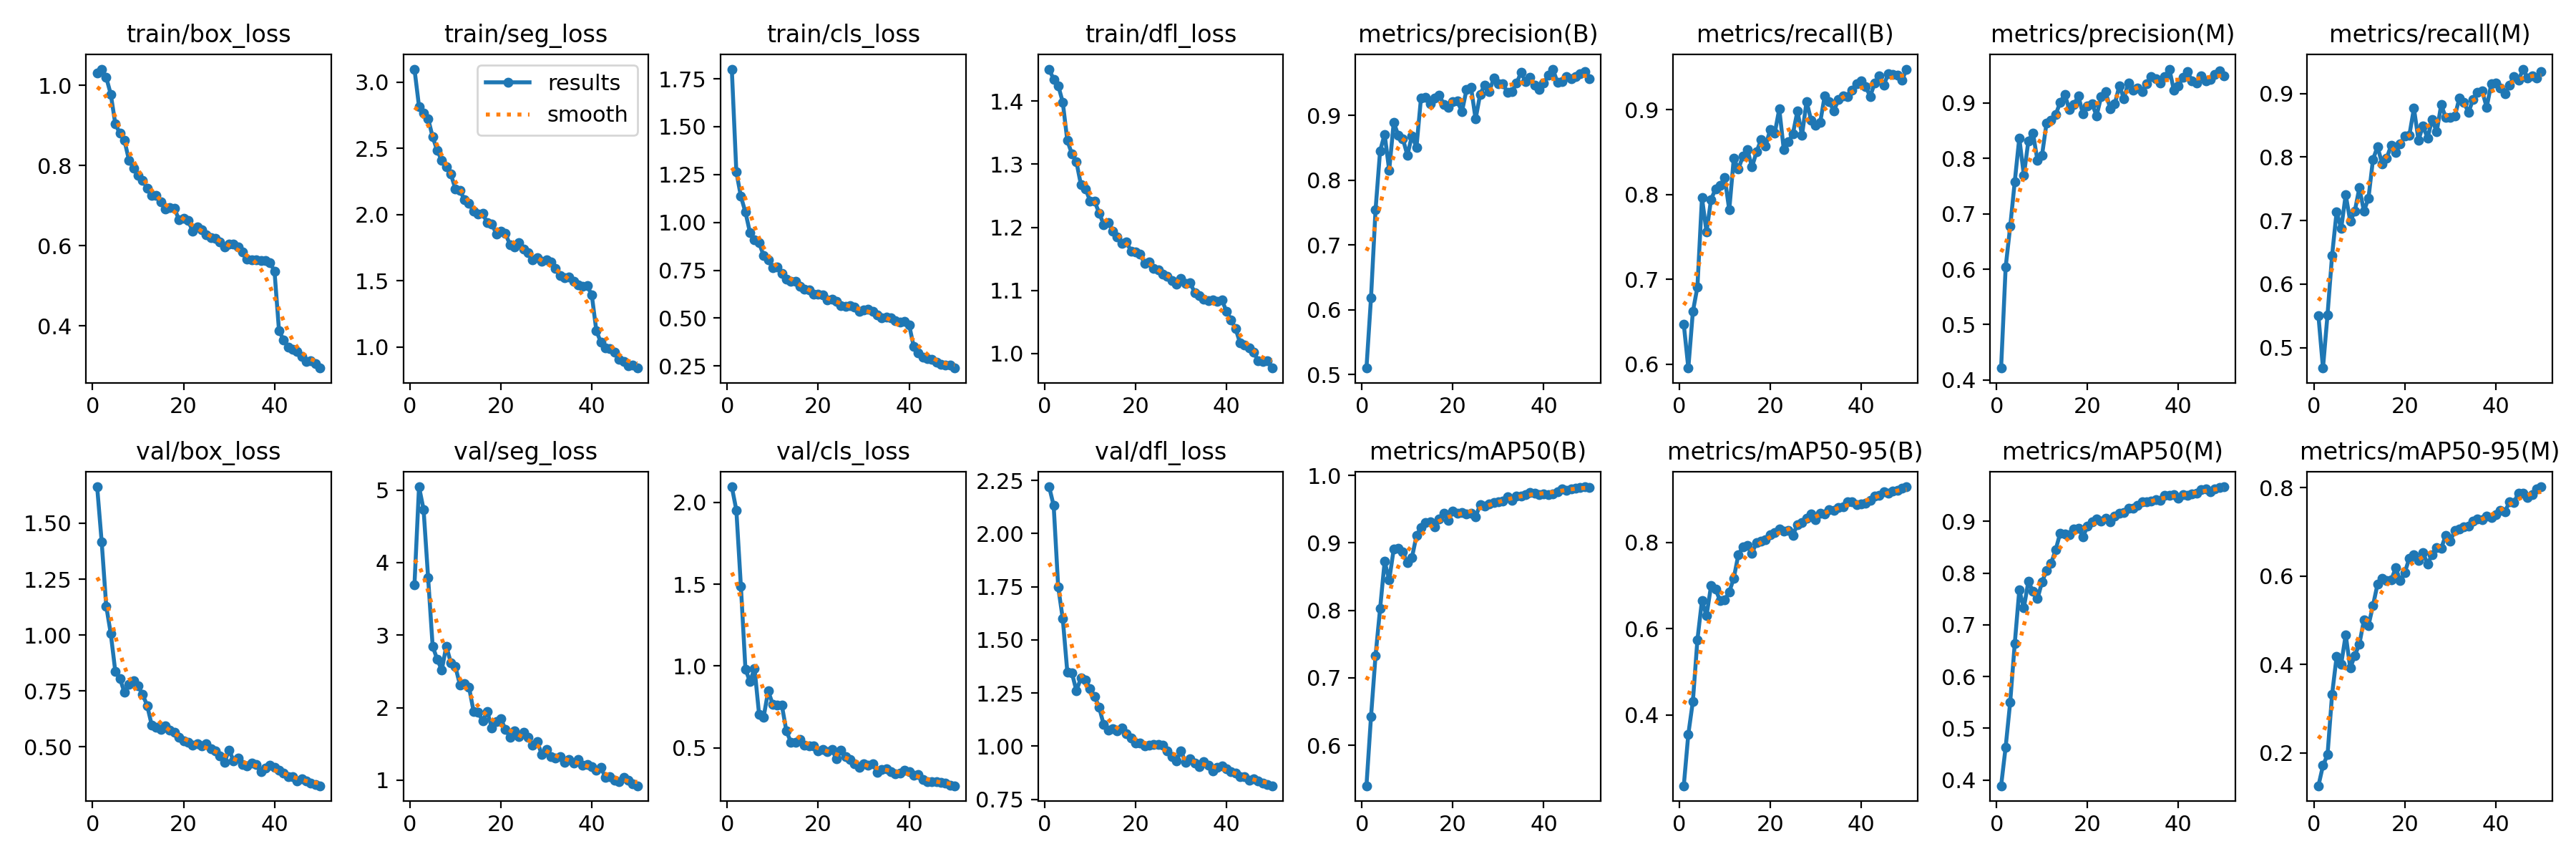

In [ ]:
from IPython.display import Image

Image("/content/runs/segment/train/results.png", width=600)